In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Solving the following ODE with Euler's Method and Trapezoidal Rule
$$
y'(t) = -y + 2 e^{-t}\cos{(2t)} \\ y(0) = 0
$$
The equation has the following exact solution
$$
y(t) = \exp(-t)\sin(2t)
$$

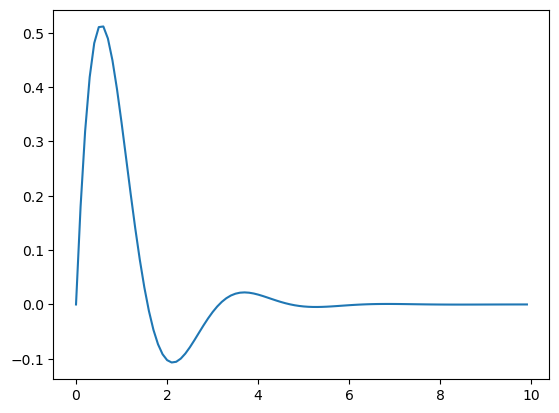

In [4]:
#Exact solution
h = 1e-1
tg = np.arange(0,10,h)
def yExact(t):
    soln = np.exp(-t)*np.sin(2*t)
    return soln

plt.plot(tg,yExact(tg))
plt.show()

In [5]:
#Euler's Method


def EulerSolver(y0,h,t):
    Ey = [y0]
    for i in t:
        n = np.where(t == i)
        n = n[0][0]
        yn = Ey[n] + h*(-Ey[n] + 2*np.cos(2*i)*np.exp(-i))
        Ey.append(yn)
    return Ey

In [6]:
#Trapezoidal Rule
def trapRule(y0,h,t):
    y = [y0]
    for i in t:
        
        n = np.where(t==i)
        n = n[0][0]
        v = y[n] + 0.5*h*(-y[n] + 2*np.cos(2*i)*np.exp(-i))
        if n<len(t)-1: #Setting max n+1 as the last index
            u = 0.5*h*(2*np.exp(-t[n+1])*np.cos(2*t[n+1]))
            yn = (v+u)/(1+0.5*h)
            y.append(yn)
    return y

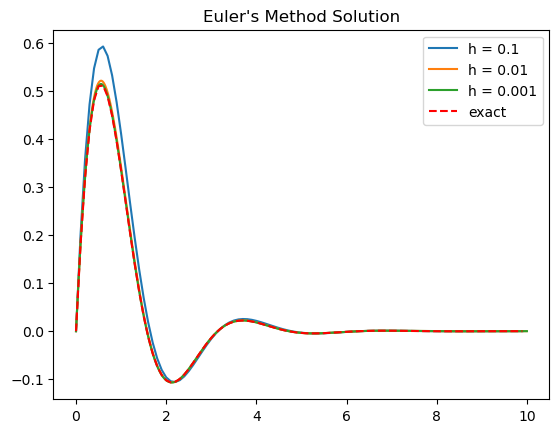

In [7]:
# Euler's Solution
for h in [1e-1,1e-2,1e-3]:
    t = np.arange(0,10,h)
    soln = EulerSolver(0,h,t)
    plt.plot(t,soln[:-1],label=f"h = {h}")

plt.plot(tg,yExact(tg),"r--",label="exact")
plt.title("Euler's Method Solution")
plt.legend()
plt.show()

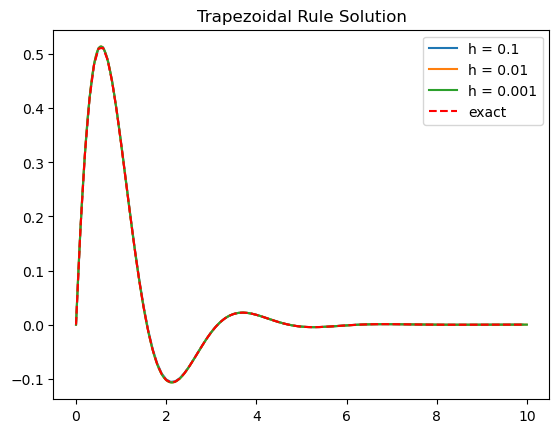

In [11]:
#Trapezoidal Rule Solution
for h in [1e-1,1e-2,1e-3]:
    t = np.arange(0,10,h)
    soln = trapRule(0,h,t)
    plt.plot(t,soln,label=f"h = {h}")

plt.plot(tg,yExact(tg),"r--",label="exact")
plt.title("Trapezoidal Rule Solution")
plt.legend()
plt.show()

/tmp/ipykernel_15070/1031321792.py:12: RuntimeWarning: divide by zero encountered in log
  eulerError = np.log(Error(EulerSolver(0,h,t)[:-1],yExact(t)))
/tmp/ipykernel_15070/1031321792.py:13: RuntimeWarning: divide by zero encountered in log
  trapError = np.log(Error(trapRule(0,h,t),yExact(t)))


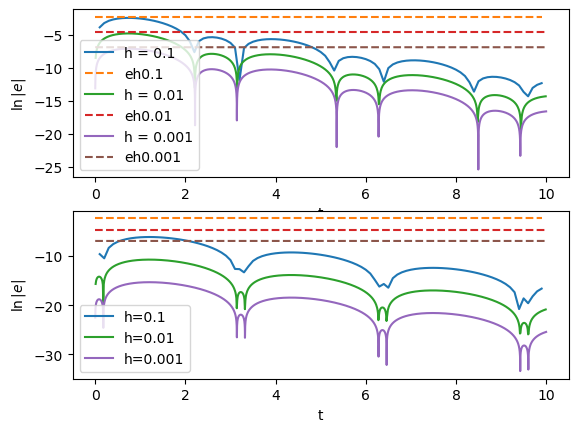

In [9]:
#Error Analysis of Euler's Method and Trapezoidal Rule (logarithm)
def Error(x,y):
    return abs(x-y)

for h in [1e-1,1e-2,1e-3]:
    t = np.arange(0,10,h)
    e = np.zeros_like(t)
    e2 = np.zeros_like(t)
    e2 += 2*np.log(h)
    e+=np.log(h)
    soln = EulerSolver(0,h,t)
    eulerError = np.log(Error(EulerSolver(0,h,t)[:-1],yExact(t)))
    trapError = np.log(Error(trapRule(0,h,t),yExact(t)))
    
    
    plt.subplot(2,1,1)
    plt.plot(t,eulerError,label=f"h = {h}")
    plt.plot(t,e,"--",label=f"eh{h}")
    plt.ylabel("$\ln{|e|}$")
    plt.xlabel("t")
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(t,trapError,label=f"h={h}")
    plt.plot(t,e,"--")
    plt.ylabel("$\ln{|e|}$")
    plt.xlabel("t")
    plt.legend()
    
plt.show()

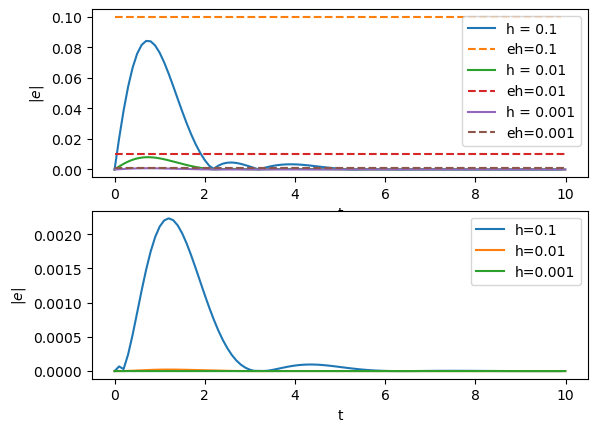

In [12]:
#Error Analysis of Euler's Method & Trapezoidal Rule
def Error(x,y):
    return abs(x-y)

for h in [1e-1,1e-2,1e-3]:
    t = np.arange(0,10,h)
    e = np.zeros_like(t)
    e+=h
    soln = EulerSolver(0,h,t)
    eulerError = Error(EulerSolver(0,h,t)[:-1],yExact(t))
    trapError = Error(trapRule(0,h,t),yExact(t))
    
    
    plt.subplot(2,1,1)
    plt.plot(t,eulerError,label=f"h = {h}")
    plt.plot(t,e,"--",label=f"eh={h}")
    plt.ylabel("$|e|$")
    plt.xlabel("t")
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(t,trapError,label=f"h={h}")
    plt.ylabel("$|e|$")
    plt.xlabel("t")
    plt.legend()



plt.show()